# Project 4: Hacking Food & Nutrition 
Team Zilberman


Target States in India: Tamil Nadu, West Bengal  
**Key: Comparison across two states**

**Goals:**

- In this project we will identify the food demand systems and nutritional systems within the populations of two regions in **India: Bengal (West Bengal) and Tamil Nadu**. Both of these regions suffer from nutritional inadequacy as there has been recently an emphasis on the quantity of food produced (large scale cash crops), rather than diverse nutritional quality. We will assess which nutrients are most lacking in each population and propose policies that will foster a healthier and more sustainable food supply, all while considering food prices, household budgets, and other household characteristics within these populations.


## Table of contents
1. [Import Data Libraries](#im)
2. [[A] Choice of Dataset](#da)
3. [For Tamil Nadu](#tn) 
    1. [[A] Estimate Demand System ](#demand)
    2. [[A] Nutritional Adequacy ](#nut)
4. [For West Bengal](#ben) 
    1. ....

# Import Data Libraries <a name="im"></a>

In [2]:
!pip install -r requirements.txt
import cfe

cfe.Result?
import pandas as pd 
from cfe.df_utils import to_dataframe

import ipywidgets
from ipywidgets import interactive, fixed, interact, Dropdown
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import fooddatacentral as fdc


  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: plotly
    Found existing installation: plotly 5.2.1
    Uninstalling plotly-5.2.1:
      Successfully uninstalled plotly-5.2.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

t

# [A] Choice of Dataset <a name="da"></a>

We acquired our data from the Indian National Sample Survey (NSS). These original parque files contain data from a very large pool of households from 35 states; the following parts establish dataframes for our choosen Bengal and Tamil Nadu population.

**The raw data processing steps are omitted from this notebook for the sake of conciseness. Throughout this project, we identified and fixed some significicant data issue with the raw files from project 3:**

- unit of quantity not standardized 
- quantity listed in kg and liters are in fact in grams

**These would create huge discrepency and undermine the credibility of our estimation.** Upon fixing these issues, we are going to start project 4 with directly reading the datasets saved with the estimation results using methodology adapted from project 3. 

Since we are examining two states, we have to run two sets of identical code of all deliverables for each state.

-----------
# For Tamil Nadu <a name="tn"></a>

## A. [A] Estimate Demand System <a name="demand"></a>

An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated from the NSS Tamil Nadu data:

In [3]:
#reading results saved as a ds
r = cfe.from_dataset('./tamil_nadu_final_result.ds',engine='netcdf4')
r

<xarray.Result>
Dimensions:           (i: 90, k: 19, t: 1, m: 1, j: 6647, kp: 19)
Coordinates:
  * i                 (i) object 'apple' ... 'wheat/atta - other sources'
  * k                 (k) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * j                 (j) object '457101101' '457101102' ... '709982301'
  * kp                (kp) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             float64 nan
    beta              (i) float64 0.2982 0.271 0.3811 ... 0.3181 0.09851 0.3412
    delta             (k, i) float64 0.07319 0.02737 ... 0.3409 -0.01923
    prices            (i, t, m) float64 126.6 52.54 21.42 ... 53.19 9.341 37.77
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 ... 1.386 0.6931 1.099
    loglambdas        (j, t, m) float64 -0.04671 -0.979 0.2504 ... 1.903 1.609
    ...                ...
    se_beta           float64 nan
    se_alpha          float64 nan
    se_a              (i, t, m) float64 0.01268 0.007879 ... 0.008274 0.01735
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              (i, t, m) float64 4.841 3.962 3.064 ... 3.974 2.234 3.632
    z                 (k, j, t, m) float64 0.0 0.0 0.0 ... 1.386 0.6931 1.099
Attributes:
    firstround:            1
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

## Interpreting Parameters

### $\alpha$:
higher $\alpha$, larger share in total food expenditure

- more luxry items, such as cooked meals and liquor, constitute a higher proportion in food expenditure 
- goods like spices (tumeric, salt, chillies, ginger) intuitively have smaller alphas 

In [7]:
# alpha sorted in descending order 
r.get_alpha(as_df=True).dropna().sort_values(ascending=False)

i
cooked meals                        5.530392
foreign liquor or refined liquor    5.502684
lpg                                 5.120414
milk: liquid                        5.102567
cigarettes                          5.072392
                                      ...   
chillis (green)                     1.406527
salt                                1.290151
matches                             1.162702
ginger                              1.148000
oilseeds                            1.126437
Name: alpha, Length: 90, dtype: float64

### $\beta$:
Income elasticity parameter

- how sensitive demand for a good is compared to changes in other economic factors, such as price or income
- higher beta, more elastic, more demanded when food budget is higher

In [9]:
r.get_beta(as_df=True).dropna().sort_values(ascending=False)

i
cashewnut                          0.557757
ghee                               0.499771
electricity                        0.448160
carrot                             0.412492
raisin (kishmish, monacca etc.)    0.411014
                                     ...   
kerosene-pds                       0.017745
matches                           -0.020537
pan : leaf                        -0.031982
rice - P.D.S.                     -0.062167
firewood & chips                  -0.106539
Name: beta, Length: 90, dtype: float64

### $\delta$:
Effect of household characteristic on demand 


In [10]:
to_dataframe(r.delta).unstack('k')

k,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log Hsize
i,,,,,,,,,,,,,,,,,,,
apple,0.073193,-0.001645,0.052724,0.028196,-0.010756,0.026764,0.060359,0.093082,0.088612,0.030369,0.027767,0.075104,-0.027465,0.005356,0.028273,0.070663,0.131485,-0.012242,0.092408
arhar (tur),0.027373,-0.040300,-0.042641,-0.018622,0.037128,0.049466,0.134743,0.113700,0.090923,-0.063823,-0.039815,-0.083341,-0.015871,0.011992,0.075258,0.095507,0.053468,-0.005751,0.629605
banana,-0.072368,-0.039648,-0.011825,-0.020688,-0.035252,0.017445,0.134937,0.150032,0.107098,-0.043403,-0.022666,0.003341,-0.065530,-0.013503,0.021301,0.070626,-0.020015,0.004976,0.265914
besan,-0.249525,-0.034396,-0.041101,0.010926,0.045697,-0.003774,0.053424,0.040408,0.055361,0.011158,-0.075592,0.020729,-0.013442,0.100080,0.056053,0.083859,0.148918,0.032955,0.362895
black pepper,-0.116639,-0.096475,-0.072696,-0.046868,-0.020677,-0.003834,0.065494,0.034353,0.016814,-0.207500,-0.036703,-0.100759,-0.028687,-0.002785,-0.013510,-0.003631,0.000137,-0.033404,0.525002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tomato,-0.044180,-0.094050,-0.079028,-0.075340,-0.064174,-0.061953,0.011734,0.005607,-0.029408,-0.102852,-0.070467,-0.094106,-0.072415,-0.094098,-0.051579,0.010562,-0.010743,-0.127810,0.727642
turmeric,-0.054917,-0.094117,-0.066273,-0.058445,0.004203,-0.009018,0.046495,0.037282,0.035982,-0.071723,-0.063703,-0.045858,-0.086489,-0.061465,-0.053960,-0.014529,0.002912,-0.052109,0.564178
urd,0.016715,-0.070871,-0.085657,-0.069282,-0.040767,-0.043362,0.101467,0.106081,0.116233,-0.109367,-0.061688,-0.092530,-0.099086,-0.050777,0.007189,0.106551,0.058531,-0.011386,0.706739


The triple of parameters $(\alpha,\beta,\delta)$ completely describes the demand system and the corresponding utility function (over the goods we observe).

## Demands
As mentioned above, we&rsquo;ve estimated the parameters of a Frischian demand system (demands that depend on prices and the households marginal utility of expenditures). But we can *compute* the corresponding Marshallian (depends on prices and budget) or Hicksian (depends on prices and the level of utility) demands for this same population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$ and prices.

In [14]:
t=1
m=1

x = r.get_predicted_expenditures().sum('i')
median_x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)

# Note selection of prices for Tamil Nadu
p = r.prices.sel(t=t,m=m).fillna(1).copy()

p.to_dataframe().fillna(1).squeeze()
p_df = p.to_dataframe().fillna(1).squeeze()

We have check the reliability of our estimated prices with respect to actual market price. 

In [12]:
# showing prices for all goods in descending order
with pd.option_context('display.max_rows', None,):
    print(p_df.sort_values(by = 'prices', ascending=False))

                                                  t  m      prices
i                                                                 
foreign liquor or refined liquor                  1  1  565.359021
coffee: powder                                    1  1  531.817776
cashewnut                                         1  1  529.254976
black pepper                                      1  1  405.984789
ghee                                              1  1  378.457671
goat meat                                         1  1  358.042342
tea : leaf                                        1  1  314.452176
raisin (kishmish, monacca etc.)                   1  1  287.350566
jeera                                             1  1  237.175981
curry powder                                      1  1  198.302710
turmeric                                          1  1  188.681783
chips                                             1  1  172.302859
pickles                                           1  1  165.71

Now compute expenditures on different items.  The object `r` already knows what the estimated parameters are, and uses those automatically:

In [13]:
c=r.demands(median_x,p)
c

/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')


i
apple                         1.157931
arhar (tur)                   1.065204
banana                        1.499572
besan                         0.823195
black pepper                  0.581756
                                ...   
tomato                        1.304990
turmeric                      0.605262
urd                           1.016945
wheat/atta - P.D.S.           1.131145
wheat/atta - other sources    1.395328
Name: quantities, Length: 90, dtype: float64

Now we can trace out demands for a household with median budget but varying prices of one good while holding other prices fixed:

The `graph_demand` function takes in a food name and generate the demand curves for this good; each curve represent the demand for household of varying budget level with respect to the median budget. 

**Input Parameters:**

- **food**: a string (any food name from the xhat df columns)


In [16]:
def graph_demand(product): 
# Values for prices
    ref_price = r.prices.sel(i=product,t=t,m=m)
    P = np.linspace(ref_price/5,ref_price*5,50)

    def my_prices(p0,p=p,i=product):
        p = p.copy()
        p.loc[i] = p0*p.sel(i=i)
        return p

    for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            plt.plot([r.demands(myx,my_prices(p0))[product] for p0 in P],P)
    plt.legend(['1/4 of median budget', '1/2 of median budget','median budget', 
                '2 x median budget', '4 x median budget'])

    plt.xlabel("%s in Kgs" % product)
    plt.ylabel('Price Scale')

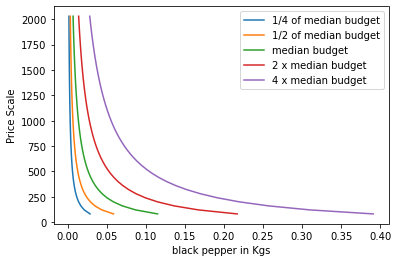

In [17]:
#example 
#
graph_demand('black pepper')

In [18]:
#interactive presentation of demand for all products 
#this step will take some time to run and respond 
all_good = p_df.sort_values(by = 'prices', ascending=False).index

interact(graph_demand, product = all_good)

interactive(children=(Dropdown(description='product', options=('foreign liquor or refined liquor', 'coffee: po…

<function __main__.graph_demand(product)>

The `graph_engel` function takes in a food name and generate an Engel's Law graph to demonstrate the relationship between total food expenditure and expenditure on a sigle food 

**Input Parameters:**

- **food**: a string (any food name from the xhat df columns)


In [19]:
def graph_engel(product):
    # Values for prices
    ref_price = r.prices.sel(i=product,t=t,m=m)

    # Range of budgets to consider
    X = np.linspace(median_x/10,median_x*10,50)

    plt.plot(X,[r.demands(x,ref_price)[product] for x in X])

    plt.ylabel("%s in Kgs" % product)
    plt.xlabel('Budget in Rupee')

/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')


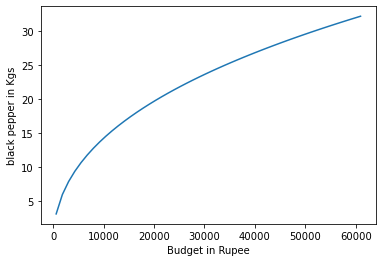

In [20]:
#example 
graph_engel('black pepper')

In [27]:
#interactive presentation of engel curves for all products 
# product is sorted based on their beta values (elasticity), 
good_beta_sort = r.get_beta(as_df=True).dropna().sort_values(ascending=False).index
interact(graph_engel, product = good_beta_sort)

interactive(children=(Dropdown(description='product', options=('cashewnut', 'ghee', 'electricity ', 'carrot', …

<function __main__.graph_engel(product)>

## B. [A] Nutritional Adequacy <a name="nut"></a>


In [41]:
# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)

p = r.prices.sel(t=t,m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p

i
apple                         126.592908
arhar (tur)                    52.544116
banana                         21.421793
besan                          67.844577
black pepper                  405.984789
                                 ...    
tomato                         16.564789
turmeric                      188.681783
urd                            53.186266
wheat/atta - P.D.S.             9.341238
wheat/atta - other sources     37.774307
Name: i, Length: 84, dtype: float64

### Nutritional Needs of Households
Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in Tamil Nadu, the number of
different kinds of people can be computed by averaging over households:


In [29]:
# In first round, averaged over households

zbar = r.z.sel(t=r.firstround,drop=True).mean(['j','m'])[:-1].squeeze() # Leave out log HSize

zbar = zbar.to_dataframe().squeeze()
#on average, there's 3.66 individuals in a household in Tamil Nadu
zbar.sum()

3.6645103054009325

Now, the inner/dot/matrix product between `zbar` and the `rda`DataFrame of requirements will give us minimum requirements for the average household:

In [30]:
DRIs = pd.read_csv('Dietary Requirements - diet_minimums.csv')
# Define *minimums*
diet_min = DRIs.set_index('Nutrition')

In [31]:
new_df = pd.DataFrame(index = diet_min.index)
new_df['Males 0-1'] =  diet_min['C 1-3'].to_list()
new_df['Females 0-1'] = diet_min['C 1-3'].to_list()
new_df['Males 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['M 4-8'])) / 2
new_df['Females 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['F 4-8'])) / 2
new_df['Males 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Females 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Males 10-15'] =  (np.array(diet_min['M 9-13']) + np.array(diet_min['M 14-18'])) / 2
new_df['Females 10-15'] =  (np.array(diet_min['F 9-13']) + np.array(diet_min['F 14-18'])) / 2
new_df['Males 15-20'] =  np.array(diet_min['M 14-18'])
new_df['Females 15-20'] =  np.array(diet_min['F 14-18'])
new_df['Males 20-30'] =  np.array(diet_min['M 19-30'])
new_df['Females 20-30'] =  np.array(diet_min['F 19-30'])
new_df['Males 30-50'] =  np.array(diet_min['M 31-50'])
new_df['Females 30-50'] =  np.array(diet_min['F 31-50'])
new_df['Males 50-60'] =  np.array(diet_min['M 51+'])
new_df['Males 60-100'] =  np.array(diet_min['M 51+'])
new_df['Females 50-60'] =  np.array(diet_min['F 51+'])
new_df['Females 60-100'] =  np.array(diet_min['F 51+'])
rda = new_df


In [32]:
#check if all age-sex range is label correctly in rda and zbar
rda.columns.difference(zbar.index)

Index([], dtype='object')

In [33]:
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda.align(zbar,axis=1)

# This matrix product gives minimum nutrient requirements for average
# household 
hh_rda = rda0.replace('',0)@zbar0

# RDA is /daily/, but  demands in our data are /monthly/:
hh_rda = hh_rda*30
hh_rda

Nutrition
Energy                            207173.762600
Protein                             5008.580563
Fiber, total dietary                2900.432676
Folate, DFE                        40465.924477
Calcium, Ca                       117632.540996
Carbohydrate, by difference        14291.590191
Iron, Fe                            1227.330375
Magnesium, Mg                      36235.843238
Niacin                              1527.752369
Phosphorus, P                      86586.422446
Potassium, K                      500589.514066
Riboflavin                           120.797954
Thiamin                              116.438544
Vitamin A, RAE                     80747.028735
Vitamin B-12                         242.795547
Vitamin B-6                          137.669174
Vitamin C, total ascorbic acid      7821.551076
Vitamin E (alpha-tocopherol)        1513.142771
Vitamin K (phylloquinone)           9999.112382
Zinc, Zn                             971.865503
dtype: float64

### Nutritional Adequacy of Food Demands

#### Food Conversion Table
As usual, we need data to convert foods to nutrients:


In [34]:
#read the csv file containing all fdc codes for TN goods
fdc_codes = pd.read_csv('proj_4_fdc_codes_tamilnadu.csv - Sheet1.csv').set_index('Item')
fdc_codes = fdc_codes.reset_index()
fdc_codes

,Item,ID
0,apple,1102644
1,arhar (tur),1977550
2,banana,1102653
3,besan,2091506
4,black pepper,170931
...,...,...
69,tea; leaf,1104262
70,tomato,1103276
71,turmeric,172231
72,urd,1898206


In [35]:
import fooddatacentral as fdc

apikey = 'CDXgPa1HVqJab8EFllem1ikOF75m2ELYwziKtICr'
D = {}
count = 0
for food in fdc_codes.Item.tolist():
    try:
        FDC = fdc_codes.loc[fdc_codes.Item==food,:].ID[count]
        count+=1
        print(FDC)
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float).fillna(0)

D

1102644
1977550
1102653
2091506
170931
1100621
2024758
1103343
1103193
1100517
1103345
2029648
170497
1648089
1100523
1100522
1104259
1919204
1155520
1102631
170922
168570
748278
577532
1028841
171907
2216557
1103354
1103844
1937534
175304
168448
2166704
1988217
1955347
1102665
1100536
1750348
1102666
1942595
1915741
2008520
1102594
2091229
1102670
1909132
1100404
598232
1103364
1102597
1889171
1103153
170917
168106
168414
170419
1103686
1102879
1103374
2057457
1102640
2129576
2077766
173468
1100464
1103933
1126152
1102697
1104274
1104262
1103276
172231
1898206
522973


,apple,arhar (tur),banana,besan,black pepper,bread (bakery),brinjal,cabbage,carrot,cashewnut,...,"sewai, noodles",sugar -other sources,"suji, rawa",tamarind,tea: cups,tea; leaf,tomato,turmeric,urd,wheat/atta - other sources
Alanine,0.00,0.0,0.00,0.0,0.616,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.33,0.0,0.0
"Alcohol, ethyl",0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Amino acids,0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Arginine,0.00,0.0,0.00,0.0,0.308,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.54,0.0,0.0
Ash,0.00,0.0,0.00,0.0,4.490,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,7.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Vitamin K (phylloquinone),2.20,0.0,0.50,0.0,163.700,0.20,0.0,38.20,13.20,36.80,...,1.40,0.00,0.0,2.8,0.00,0.00,7.90,13.40,0.0,0.0
Vitamins and Other Components,0.00,0.0,0.00,0.0,0.000,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Water,85.56,0.0,74.91,0.0,12.460,35.70,0.0,90.39,88.29,1.64,...,66.31,0.02,0.0,31.4,99.70,99.93,94.52,12.85,0.0,0.0


In [36]:
#transpose and reformat
fct = D.T


### Nutrient Demand
We can also use our demand functions to compute nutrition as a *function* of prices and budget.



In [39]:
import warnings 

def my_prices(p0,p=p,i='apple'):
    """
    Set price of good i to p0, holding remaining prices fixed at values in p.
    """
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()

# x is income, p is a vector of prices 
def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)
    
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

With this `nutrient_demand` function in hand, we can see how nutrient outcomes vary with budget, given prices:

The `nut_vs_budget` function takes in a list of nutrient and see how nutrient outcomes vary with budget

**Input Parameters:**

- **nutrient**: a list of string of nutrient names
- **budget**: a reference x; we assume the median by defalt 


In [45]:
def nut_vs_budget(nutrient, budget):
    X = np.linspace(budget/5,budget*5,50)

    df = pd.concat({myx:np.log(nutrient_demand(myx,p))[nutrient] for myx in X},axis=1).T
    ax = df.plot()
    
    ax.set_title('Nutrient Outcome v.s. Change in Budget')
    ax.set_xlabel('log budget in Rupee')
    ax.set_ylabel('log nutrient')
    

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

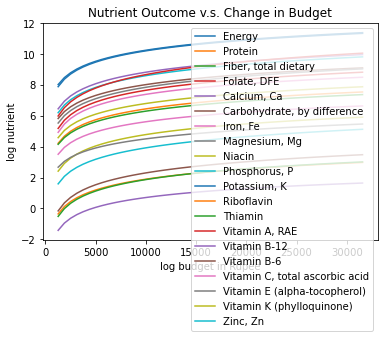

In [46]:
#example 
#all nutrients, median budget as reference budget 
AllNutrients = hh_rda.index.tolist()

nut_vs_budget(AllNutrients, budget = reference_x)

Now how does nutrition vary with prices?

The `nut_vs_prices` function takes in a list of nutrient and see how nutrient outcomes vary with changes in price for a specified food 

**Input Parameters:**

- **nutrient**: a list of string of nutrient names
- **budget**: a reference x; we assume the median by defalt 
- **good**: a specified food



In [47]:
def nut_vs_prices(nutrient, budget, good):
    ref_price = r.prices.sel(i=good,t=t,m=m,drop=True)
    P = np.linspace(1,5,20).tolist()
    ndf = pd.DataFrame({p0:np.log(nutrient_demand(budget,my_prices(p0,i=good)))[nutrient] for p0 in P}).T

    ax = ndf.plot()
    
    ax.set_title(f"Nutrient Outcome v.s. Change in Price for {good}")
    ax.set_xlabel('log price in Rupee')
    ax.set_ylabel('log nutrient')


/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

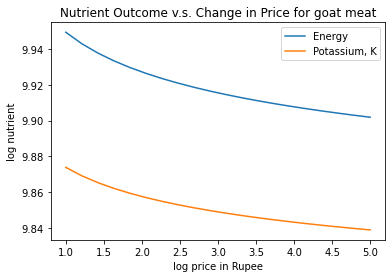

In [48]:
# example:
#goat meat; energy and potassium 

KeyNutrients = ['Energy','Potassium, K']
nut_vs_prices(KeyNutrients, reference_x, 'goat meat')


### Nutritional Adequacy

Since we can trace out demands for nutrients as a function of $(x,p)$, and we&rsquo;ve computed minimum nutritional requirements for the average household, we can *normalize* nutritional intake to check the adequacy of diet.

In [49]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/(hh_rda/30)

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.



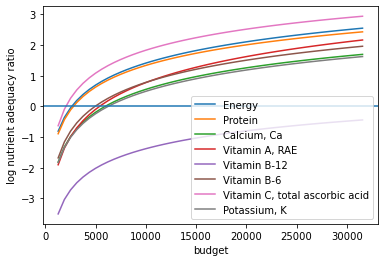

In [51]:
X = np.linspace(reference_x/5,reference_x*5,50)

UseNutrients = ['Energy',
                'Protein',
                'Calcium, Ca',
                'Vitamin A, RAE',
 'Vitamin B-12',
 'Vitamin B-6',
 'Vitamin C, total ascorbic acid',
'Potassium, K']

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)

As before, we can also vary relative prices.  Here we trace out nutritional adequacy varying the price of a single good:

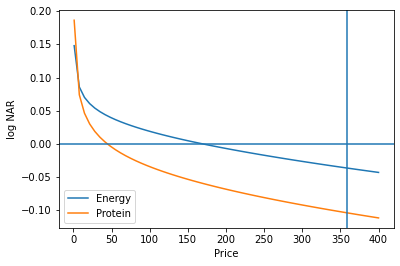

In [55]:
poorer_x = reference_x/2.5

good = 'goat meat'

ExNutrients = ['Energy', 'Protein']

Pscale = np.linspace(1,400,60).tolist()

log_nar = {s0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(s0,p,i=good)))[ExNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
ax.axvline(p[good])

#vertical line atural price of good 
#horizaon line: if you are above, you have adequate nutrition 

-----------
# For West Bengal <a name="ben"></a>

We are going to replicate the code above for the second state that we are investigating; we have the code ready in the "draft" file in our github repo, but it is yet to be compiled 

We are also finalizing our code for the policy portion